# **Proyecto de IA**
## **Contexto del problema**




Cada año salen miles de video juegos, solo en Steam en el 2022 se contaron 10963 juegos nuevos. Esta franquicia relativamente reciente en comparación a otras, abarca cada vez más mercado. Salen nuevas consolas, nuevos juegos y se unen nuvos adeptos. Todo esto nos genera ciertas preguntas sobre estos juegos.

¿Cuántos jugamos?

¿Cuántos llegamos a conocer siquiera?

Y al final, las preguntas más importantes: ¿Que hace al éxito de un juego? ¿Podemos predecir su éxito a partir de sus características?



## **Business analysis**




En este caso, podemos que los desarrolladores de juegos se hacen la misma pregunta, dado que es obvio que quieren saber si su producto será un éxito o un fracaso antes de que este llegue al público, así que llegamos a la pregunta:

¿Pueden las características de un video juego determinar si este será un éxito o fracaso antes de su lanzamiento?



## **Datos**

Los datos que tenemos tienen las siguientes columnas:
1.  Rank: El ranking del juego
2.  Name: el nombre del juego
3.  Plataform: consola/plataforma en la que se lanzó el juego
4.  Year: El año en el que se Lanzó el juego
5.  Genre: género del juego
6.  Publisher: publicador del juego
7.  NA_Sales: ventas en norte america (en millones)
8.  EU_Sales: ventas en europa (en millones)
9.  JA_Sales: ventas en Japon (en millones)
10. Other_Sales: ventas en el resto del mundo (en millones)
11. Global_Sales: ventas globales del juego (en millones)


importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importación de datos de forma local

In [3]:
df = pd.read_csv('./vgsales.csv',na_values='?')

# Observaciones iniciales

Datos iniciales

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Observación de datos, verificamos que no tengamos nulos, y observamos el tipo de las columnas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Observación de columnas y filas.

Tenemos 16598 filas y 11 columnas

In [6]:
df.shape

(16598, 11)

Observaciones iniciales de los promedios y cuartiles de nuestras variables numéricas

In [7]:
df.describe()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Limpieza de datos

Eliminamos la columna de la imagen del juego, dado que no nos será útil

In [8]:
df=df.drop(['NA_Sales'], axis=1) 
df = df.drop(['EU_Sales'], axis=1) 
df = df.drop(['JP_Sales'], axis=1) 
df =df.drop(['Other_Sales'], axis=1) 

Revisamos los valores nulos. Vemos que solo hay en Year y en Publisher. Al ser tan pocos, no afectan al resultado

In [9]:
df.isna().value_counts()

Rank   Name   Platform  Year   Genre  Publisher  Global_Sales
False  False  False     False  False  False      False           16291
                        True   False  False      False             249
                        False  False  True       False              36
                        True   False  True       False              22
dtype: int64

Revisamos el resultado para observar que solo quede lo que queremos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   Global_Sales  16598 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 907.8+ KB


## Valores atípicos

Se buscarán valores a típicos en año, dado que algunos valores pueden no tener sentido, por ejemplo, un juego que se publicó en el futuro

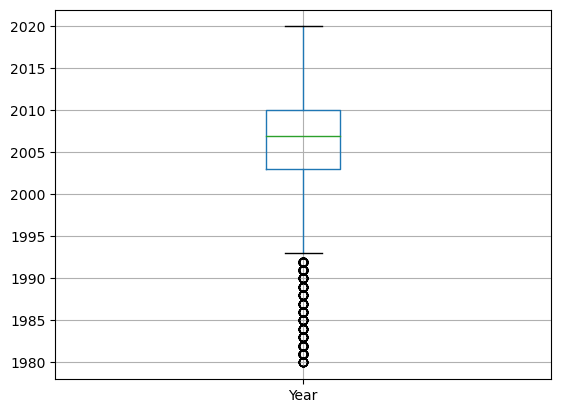

In [11]:
b_plot=df.boxplot(column='Year') 
b_plot.plot()
plt.show()

Tenemos datos atípicos, pero estos tienen sentido ya que serían juegos viejos

Buscamos valores atípicos en Global_Sales

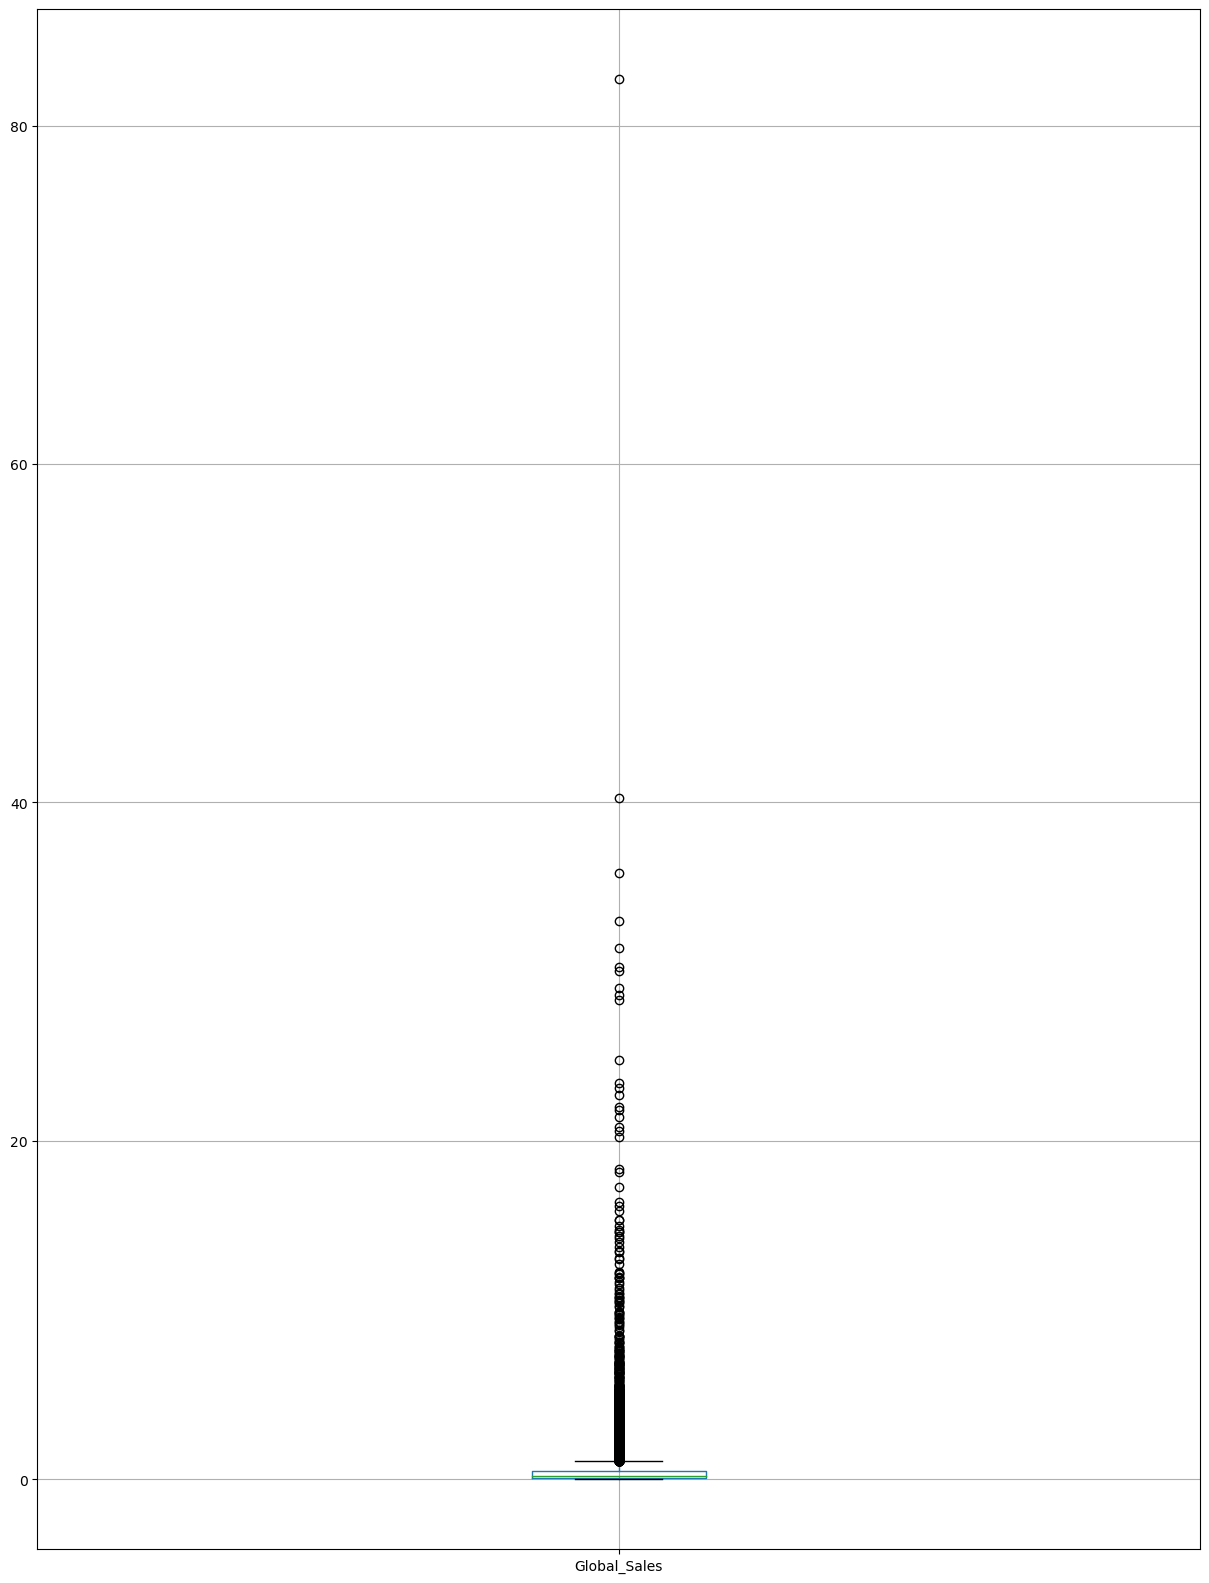

In [12]:
b_plot=df.boxplot(column='Global_Sales',figsize=(15,20)) 
b_plot.plot()
plt.show()

Se observa que tenemos muchos datos cercanos a 0, podemos observar el promedio y los cuartiles para más información

In [13]:
df['Global_Sales'].describe()

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64

Podemos observar que efectivamente la mayoría de nuestros datos se encuentran entre 0.06 y 0.47, por lo cual nuestros datos no estarían balanceados

Visualización del desbalance de datos

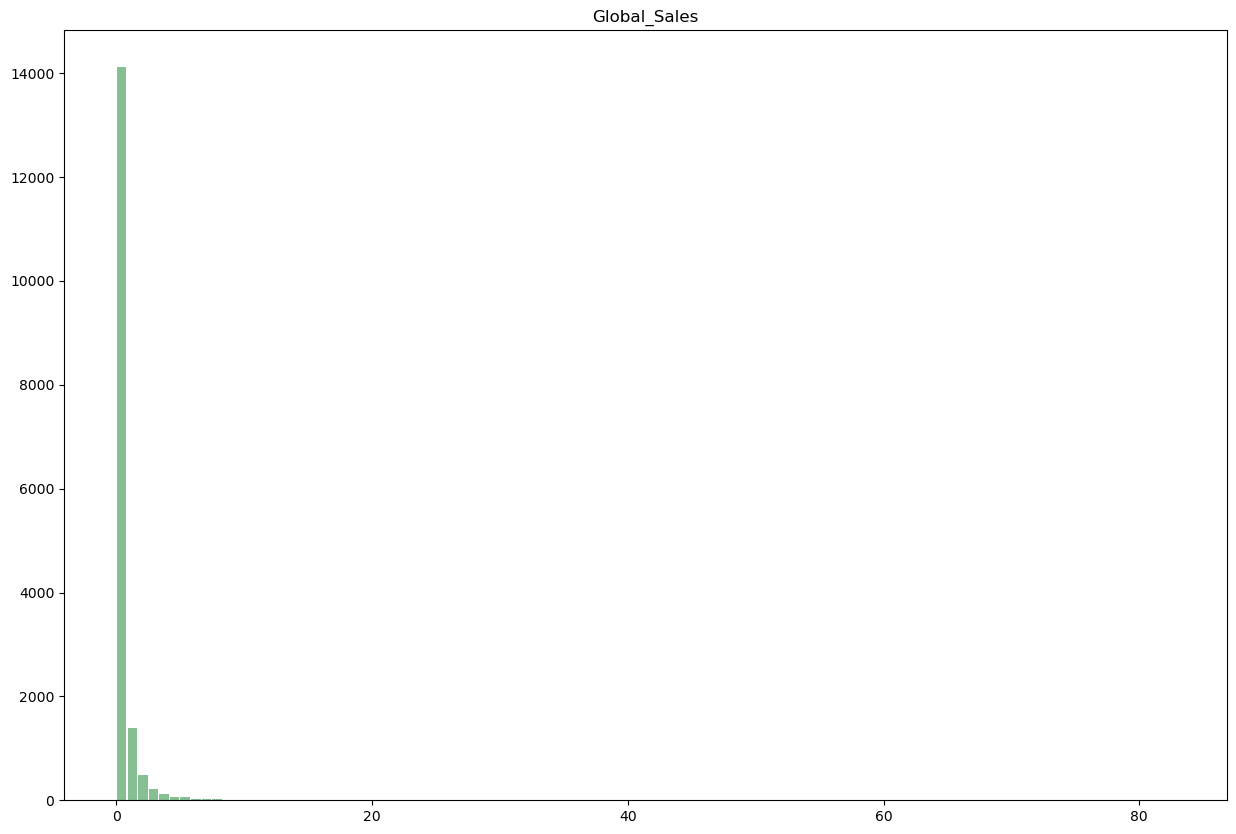

In [14]:
df.hist(column='Global_Sales', bins=100, grid=False, figsize=(15,10), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

# Creación de los df con dummies

In [15]:
dfWithDummiesGen =  pd.concat([df, pd.get_dummies(df['Genre'])], axis=1)
dfWithDummiesPubli=pd.concat([df, pd.get_dummies(df['Publisher'])], axis=1)
dfWithDummiesPlataform=pd.concat([df, pd.get_dummies(df['Platform'])], axis=1)

# dummies de genero 
## Heat map    dummies de genero 

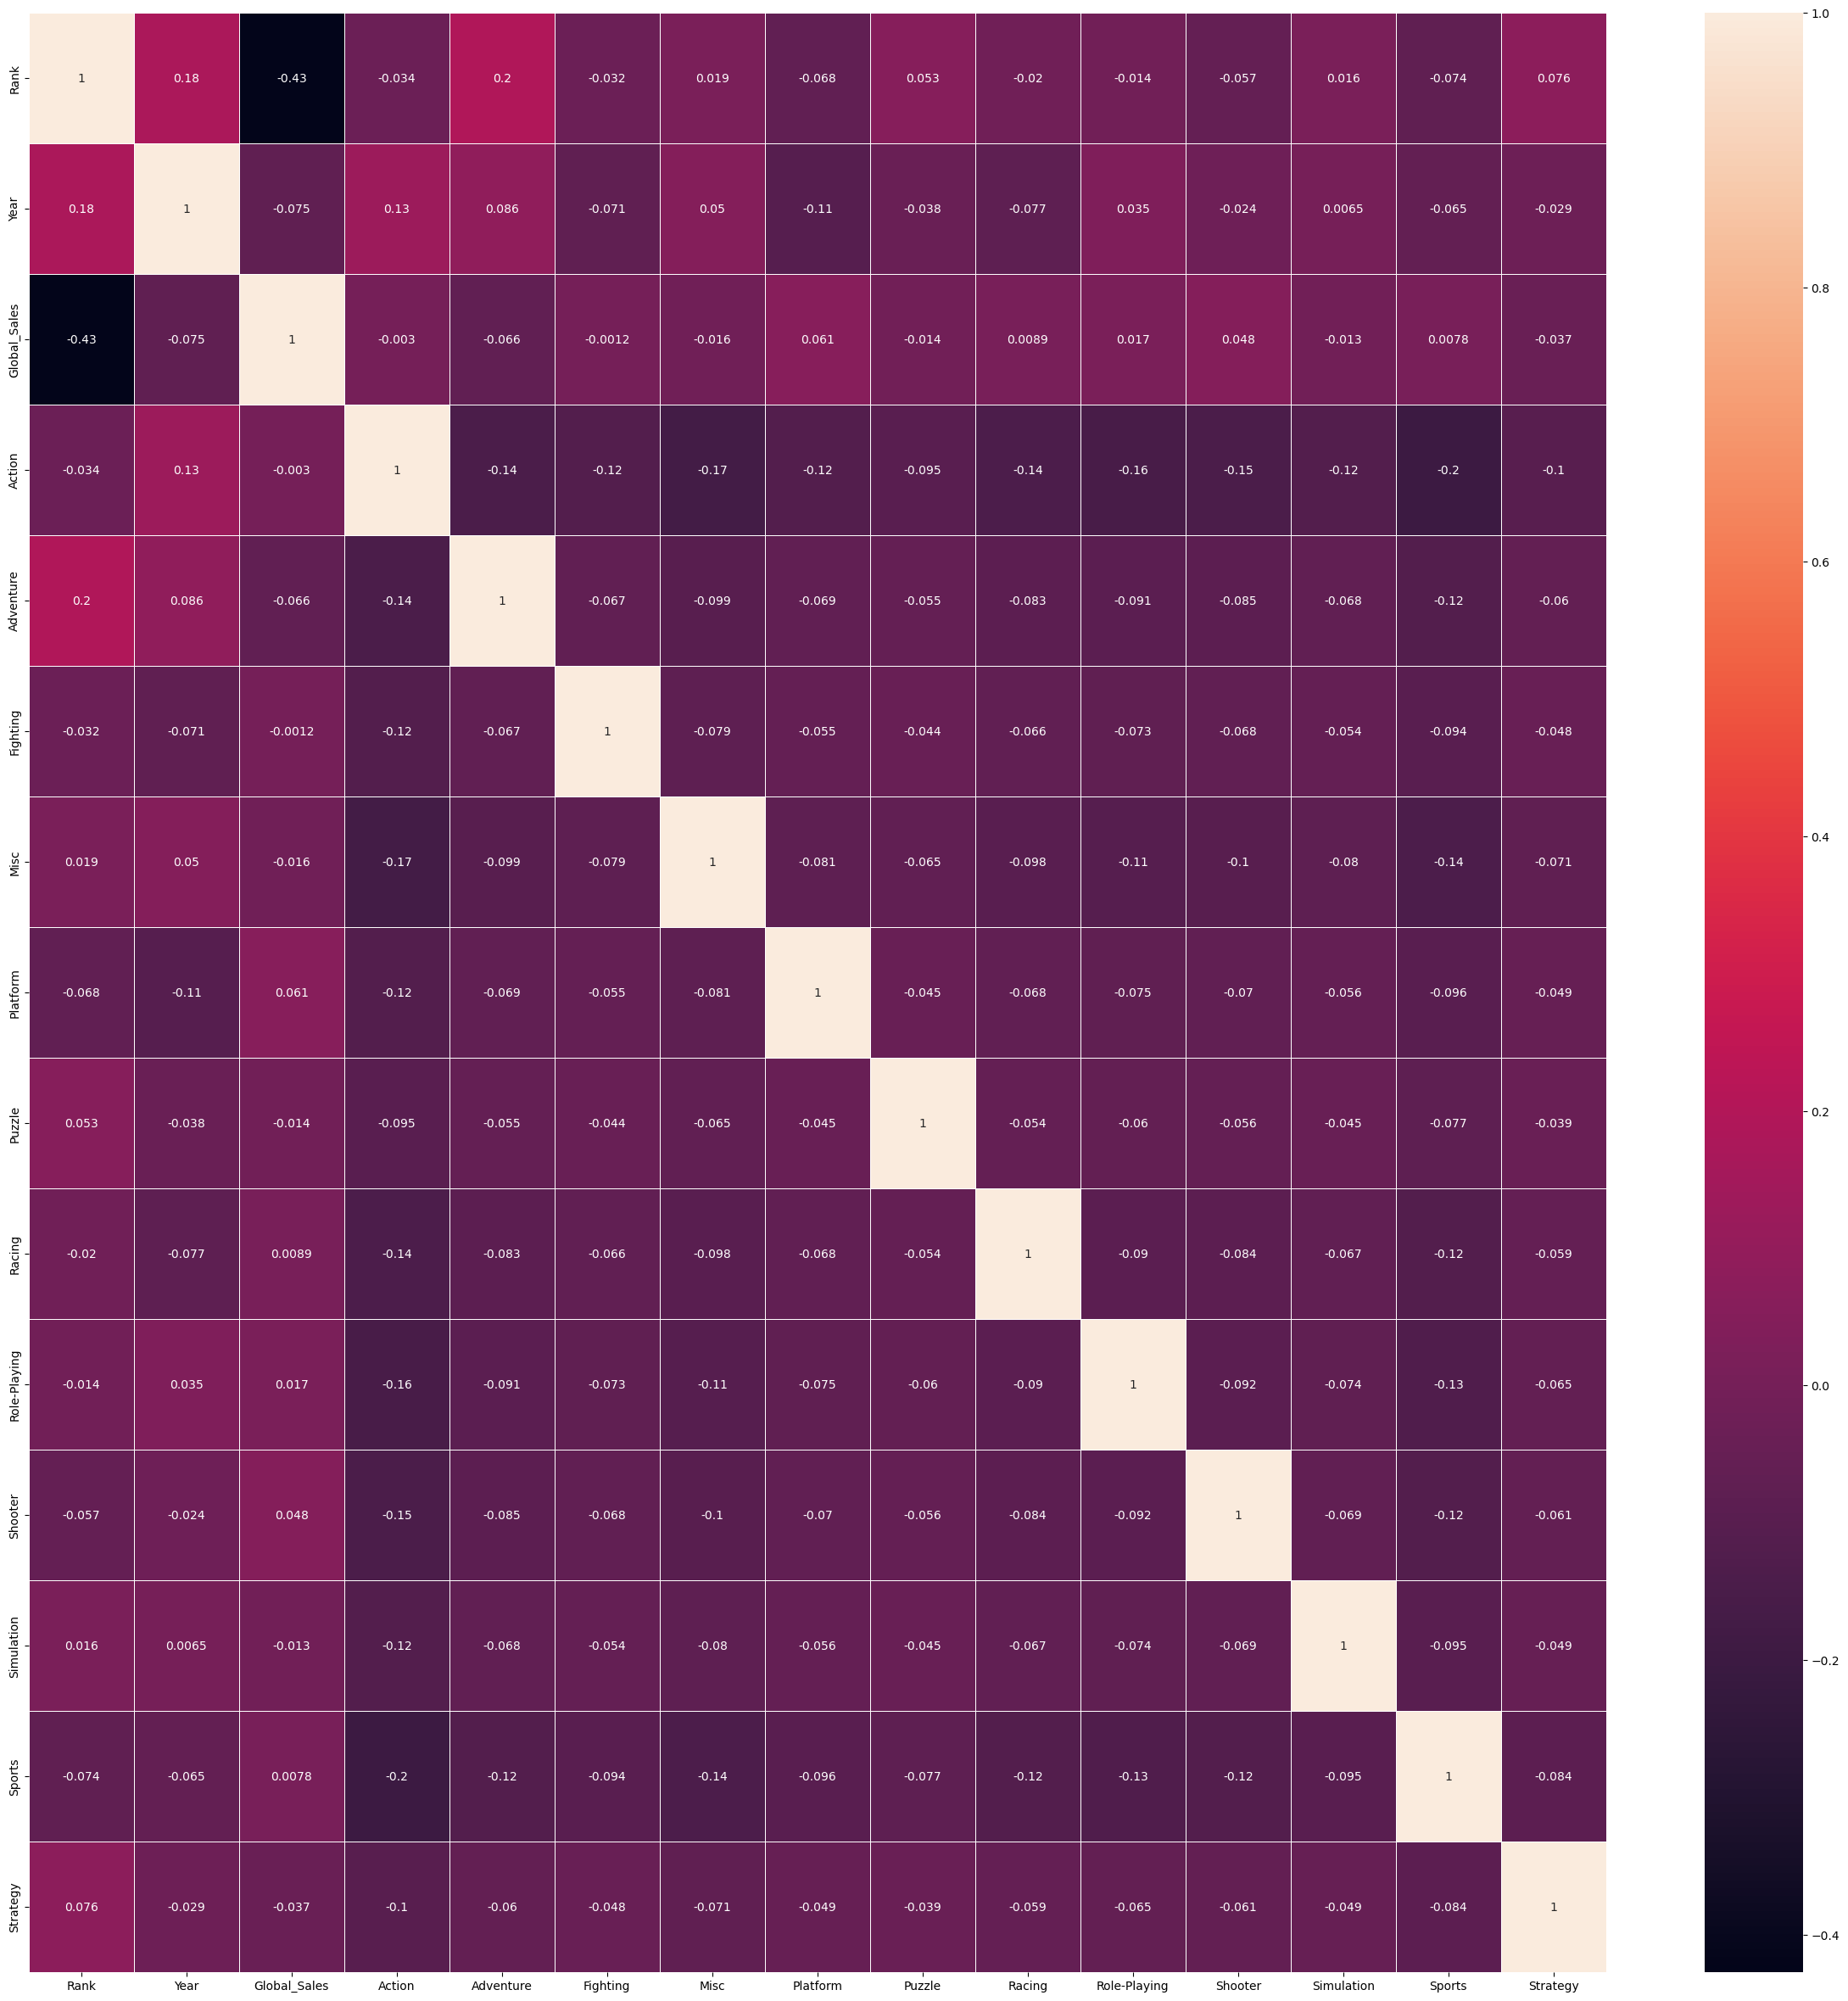

In [16]:
plt.figure(figsize = (30,30))
sns.heatmap(dfWithDummiesGen.corr(),annot=True,linewidths=.5)
plt.show()

Observación de las correlaciones más altas

In [17]:
dfWithDummiesGen.corr()['Global_Sales'].nlargest(10)

Global_Sales    1.000000
Platform        0.061223
Shooter         0.047899
Role-Playing    0.017314
Racing          0.008927
Sports          0.007796
Fighting       -0.001204
Action         -0.003001
Simulation     -0.012844
Puzzle         -0.014290
Name: Global_Sales, dtype: float64

Observación de las correlaciones más bajas

In [18]:
dfWithDummiesGen.corr()['Global_Sales'].nsmallest(10)

Rank         -0.427407
Year         -0.074735
Adventure    -0.065521
Strategy     -0.037284
Misc         -0.015770
Puzzle       -0.014290
Simulation   -0.012844
Action       -0.003001
Fighting     -0.001204
Sports        0.007796
Name: Global_Sales, dtype: float64

# Dummies de plataforma 
## Heat map 

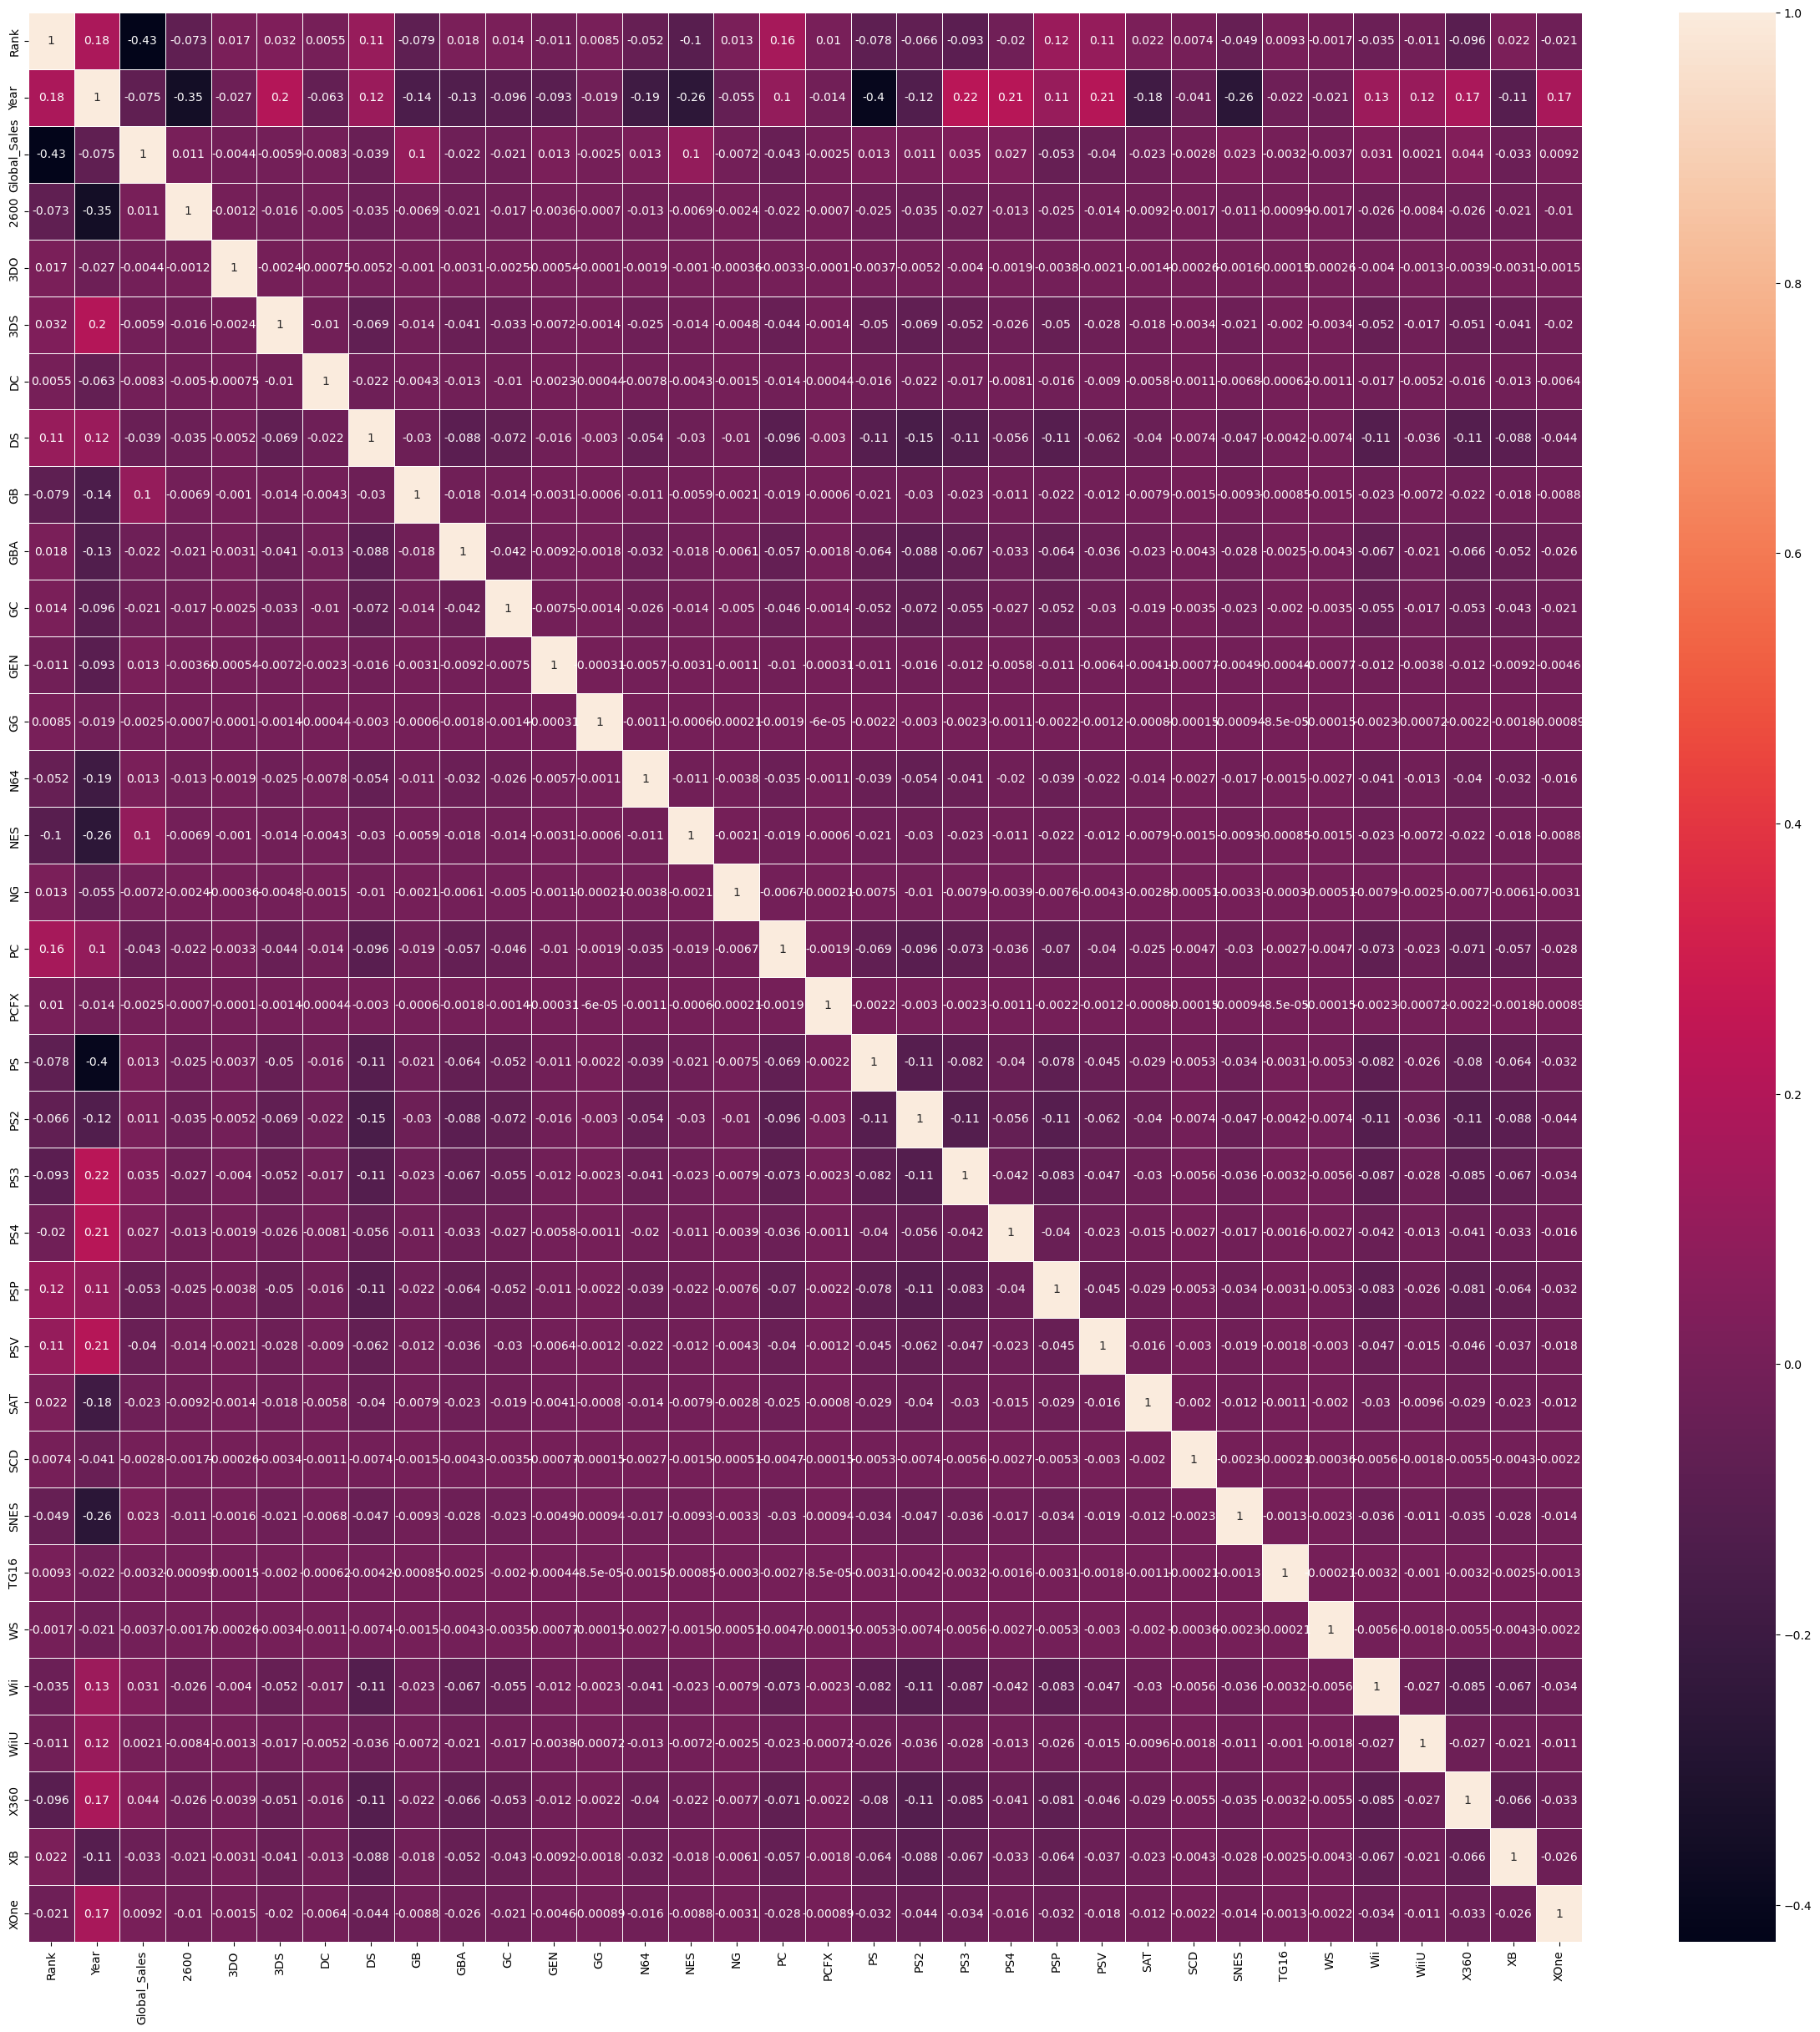

In [19]:
plt.figure(figsize = (30,30))
sns.heatmap(dfWithDummiesPlataform.corr(),annot=True,linewidths=.5)
plt.show()

Observación de las correlaciones más altas

In [20]:
dfWithDummiesPlataform.corr()['Global_Sales'].nlargest(10)

Global_Sales    1.000000
GB              0.102553
NES             0.100338
X360            0.043821
PS3             0.034774
Wii             0.030679
PS4             0.026829
SNES            0.023287
N64             0.013387
GEN             0.013315
Name: Global_Sales, dtype: float64

Observación de las correlaciones más bajas

In [21]:
dfWithDummiesPlataform.corr()['Global_Sales'].nsmallest(10)

Rank   -0.427407
Year   -0.074735
PSP    -0.052942
PC     -0.042677
PSV    -0.039806
DS     -0.039130
XB     -0.032927
SAT    -0.022656
GBA    -0.022015
GC     -0.021416
Name: Global_Sales, dtype: float64

## Df con dummies de publicadores

Dado a que este dataframe tiene demasiadas columnas dummies en el caso de Plublisher, decidimos filtrarlas para que solo tuviéramos las columnas con las mayores correlaciones con sales

In [22]:
dfWithDummiesPubli['Publisher'].unique().size

579

In [23]:
# Creamos un nuevo df solo con los dummies de publisher
publisher_dummies = pd.get_dummies(df['Publisher'])

# Se calcula la correlación entre las columnas dummies y la variable target de 'sales'
corr_for_Publisher = dfWithDummiesPubli.corr()['Global_Sales'][publisher_dummies.columns]

# El valor de correlación del que vamos a filtrar
corr_to_filter = 0.01

# Sacamos las columnas con una correlación (en valor absoluto) mayor a 0.01
corr_filtered = corr_for_Publisher[abs(corr_for_Publisher)>corr_to_filter]

# Hacemos una lista de las columnas con correlación mayor a 0.01
columns_to_keep=corr_filtered.index.tolist()

# añadimos todas las columnas que queremos al nuevo df: df_dummies_filtered
df_dummies_filtered = dfWithDummiesPubli[columns_to_keep]

Observamos las columnas con una correlación mayor a 0.01, es decir, solo 71 de las 579 columnas tienen una correlación mayor a 0.01 con nuestra variable target

In [24]:
df_dummies_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 72 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   505 Games                           16598 non-null  uint8
 1   5pb                                 16598 non-null  uint8
 2   Acclaim Entertainment               16598 non-null  uint8
 3   Activision                          16598 non-null  uint8
 4   Alchemist                           16598 non-null  uint8
 5   Aqua Plus                           16598 non-null  uint8
 6   Arc System Works                    16598 non-null  uint8
 7   Arena Entertainment                 16598 non-null  uint8
 8   Atari                               16598 non-null  uint8
 9   Atlus                               16598 non-null  uint8
 10  Avanquest                           16598 non-null  uint8
 11  BAM! Entertainment                  16598 non-null  uint8
 12  Banp

Concatenamos el df_dummies_filtered con el df original para obtener nuestra variable target

In [25]:
df_dummies_filtered = pd.concat([df, df_dummies_filtered], axis=1)

# Dummies de publisher
## Heat map del 

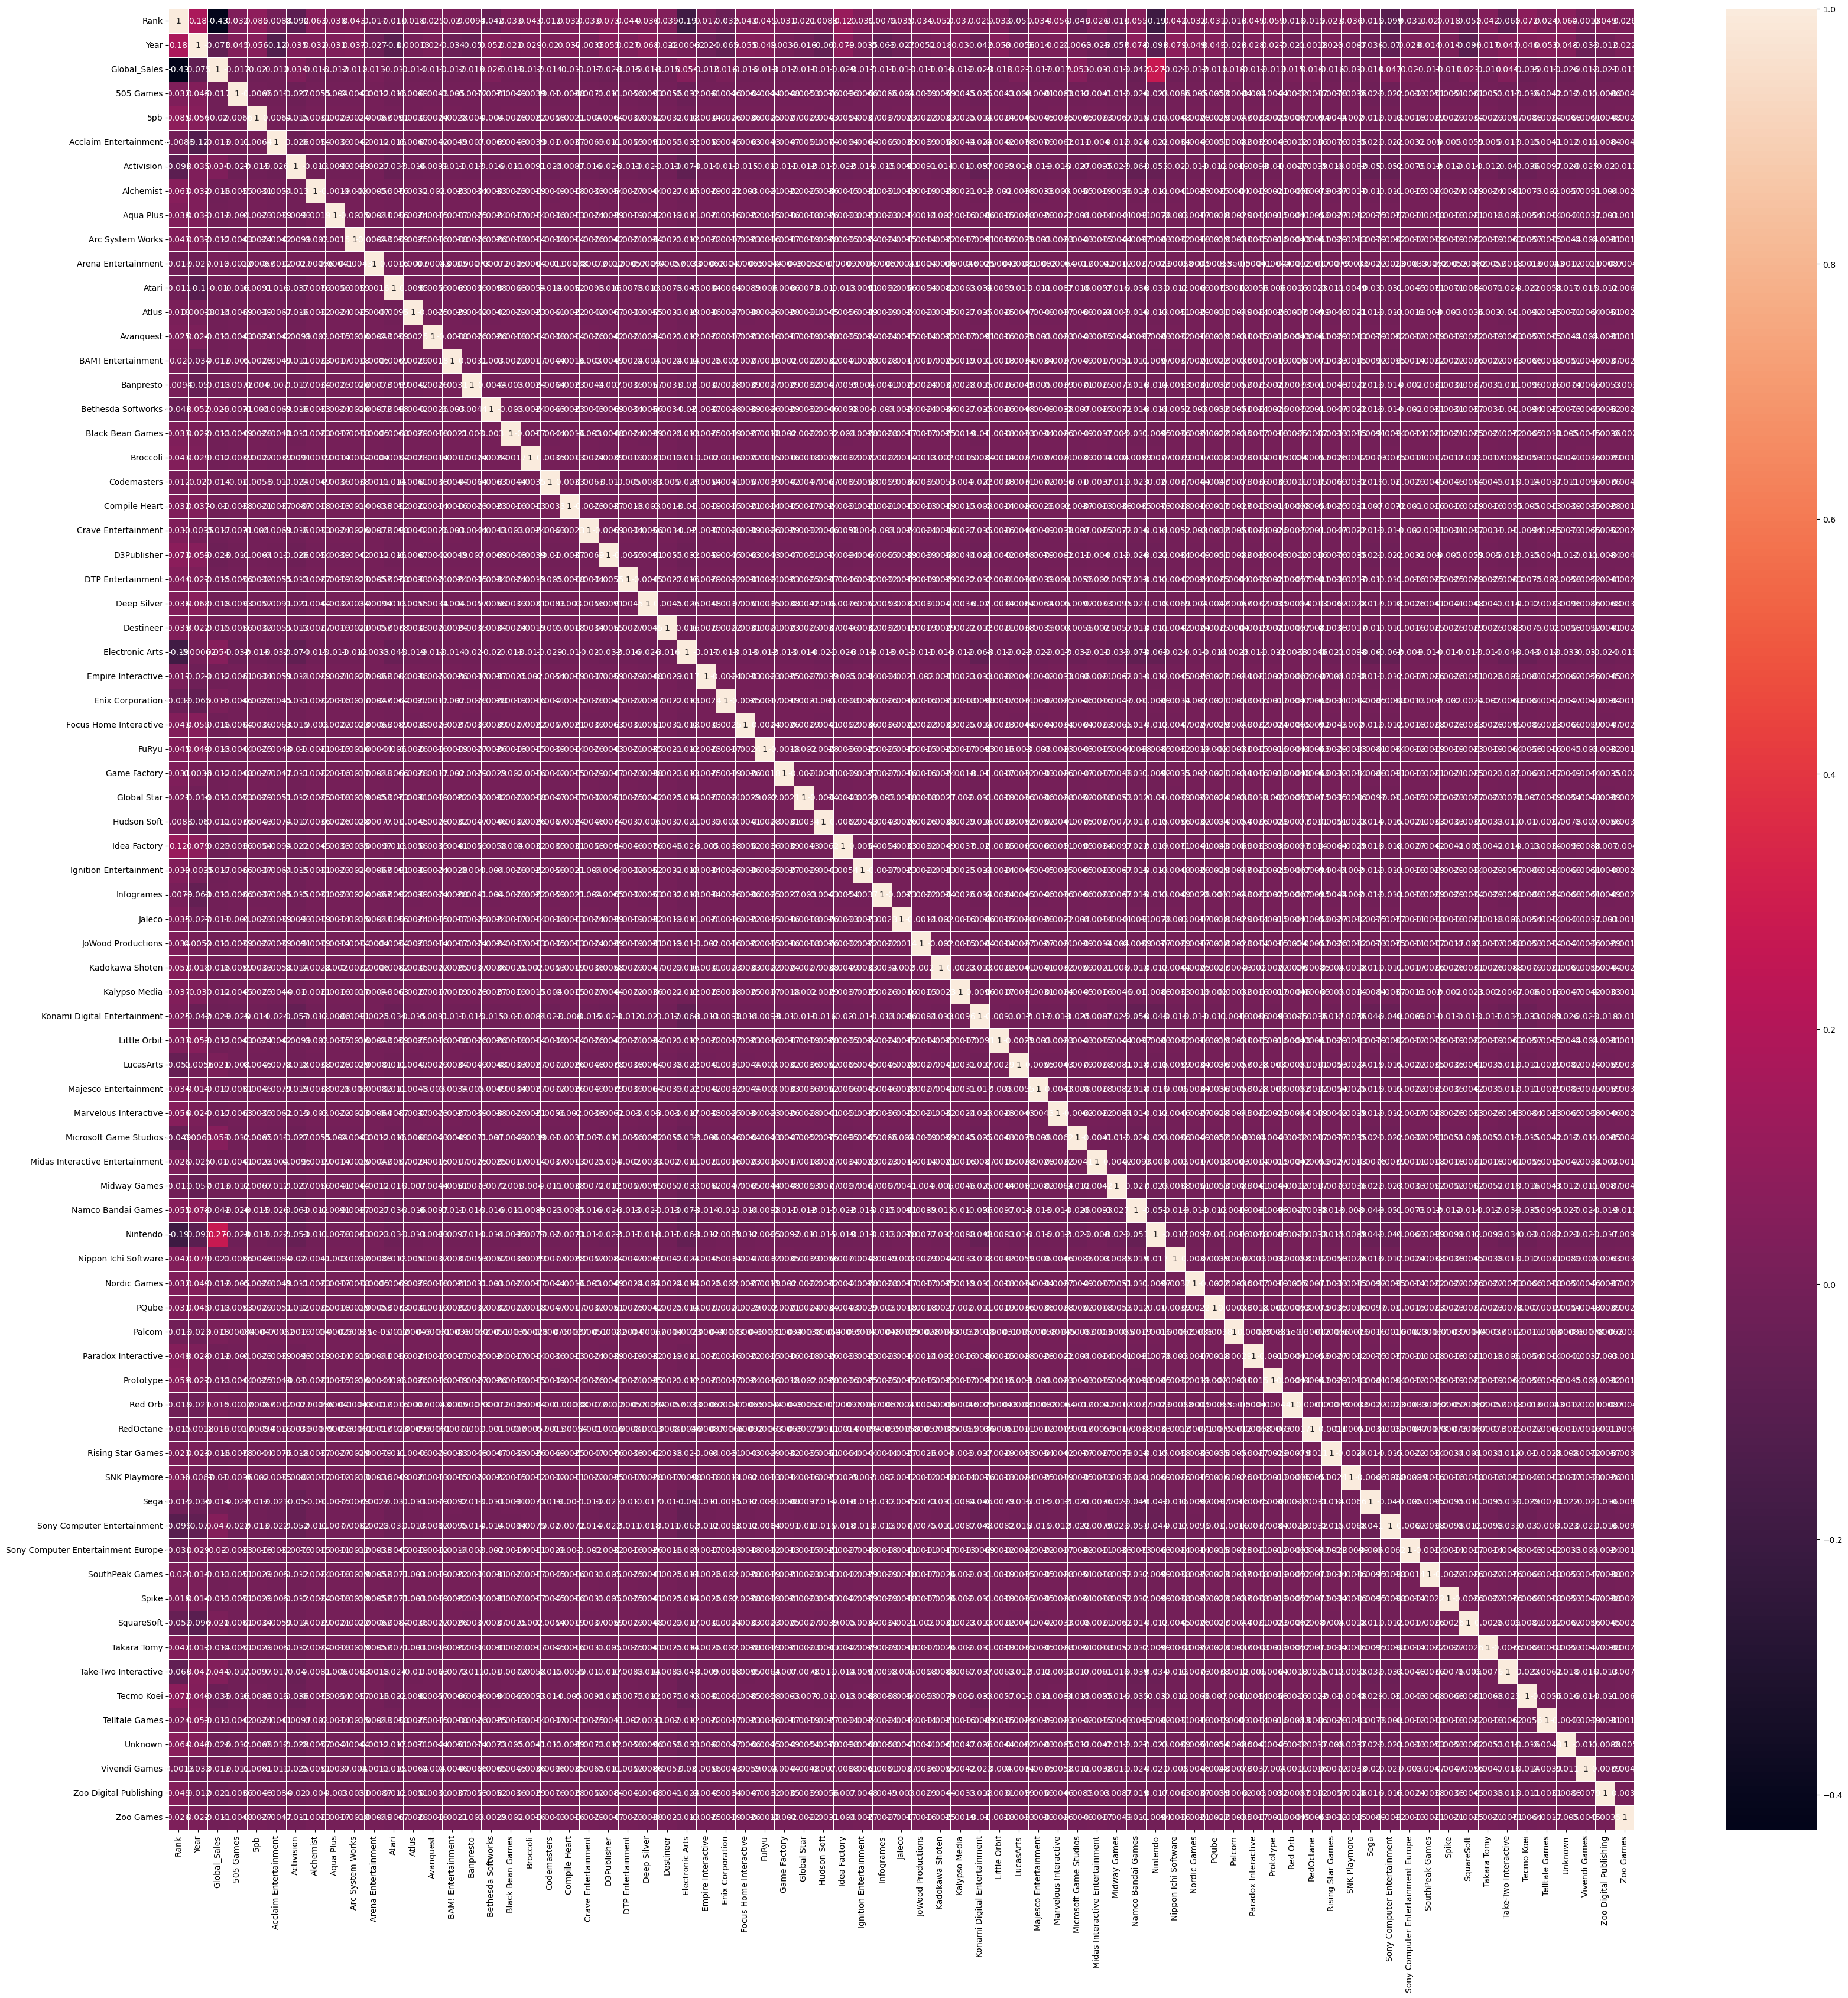

In [26]:
plt.figure(figsize = (40,40))
sns.heatmap(df_dummies_filtered.corr(),annot=True,linewidths=.5)
plt.show()

Observación de las correlaciones más altas

In [27]:
df_dummies_filtered.corr()['Global_Sales'].nlargest(10)

Global_Sales                   1.000000
Nintendo                       0.271018
Electronic Arts                0.054445
Microsoft Game Studios         0.052663
Sony Computer Entertainment    0.046897
Take-Two Interactive           0.044170
Activision                     0.033524
Bethesda Softworks             0.026111
SquareSoft                     0.020593
LucasArts                      0.020561
Name: Global_Sales, dtype: float64

Observación de las correlaciones más bajas

In [28]:
df_dummies_filtered.corr()['Global_Sales'].nsmallest(10)

Rank                           -0.427407
Year                           -0.074735
Namco Bandai Games             -0.041538
Tecmo Koei                     -0.035142
Konami Digital Entertainment   -0.029033
Idea Factory                   -0.028815
D3Publisher                    -0.027664
Unknown                        -0.026241
Zoo Digital Publishing         -0.021125
Nippon Ichi Software           -0.020599
Name: Global_Sales, dtype: float64

In [29]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [30]:
df['Global_Sales'].describe()

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64

In [31]:
df_balanced = df.copy()
df_balanced.drop(df_balanced[df_balanced.Global_Sales > 1].index, inplace=True)

In [32]:
df_unbalanced = df.copy()
df_unbalanced.drop(df_unbalanced[df_unbalanced.Global_Sales <= 1].index, inplace=True)

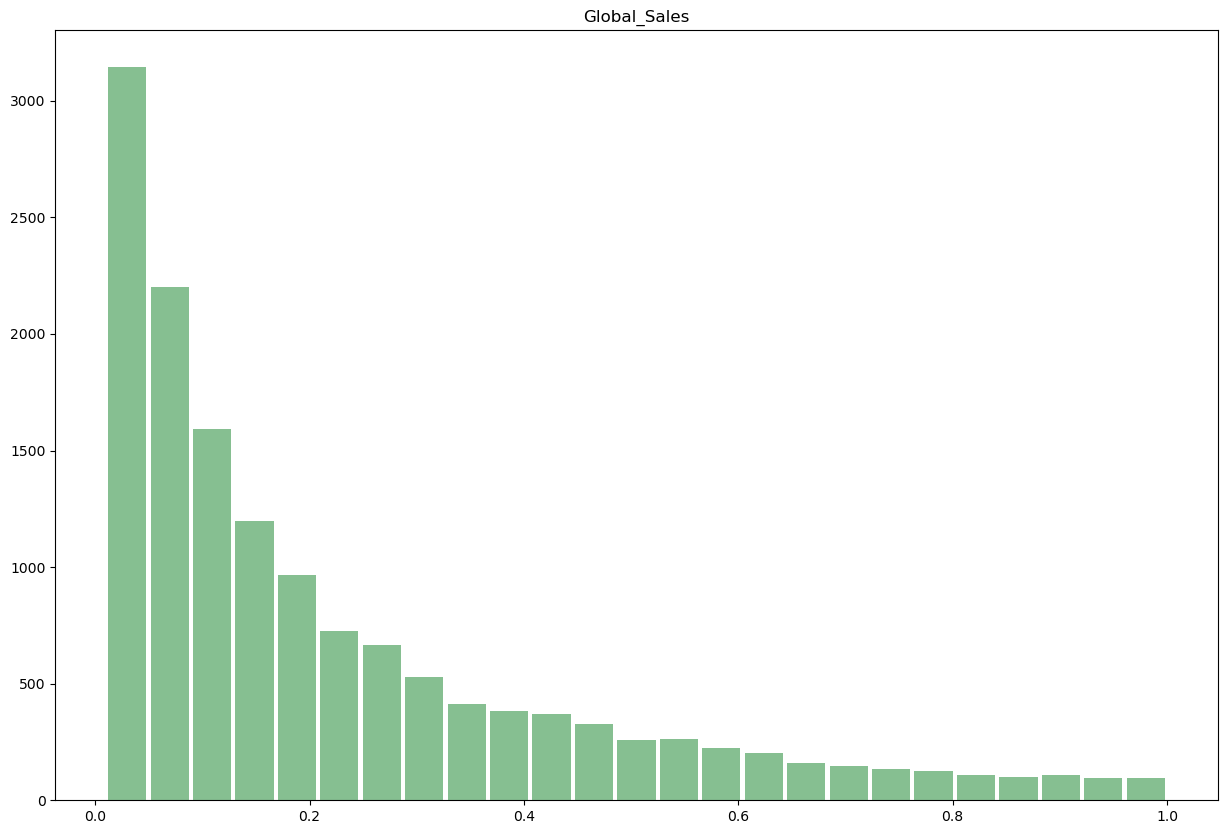

In [33]:
df_balanced.hist(column='Global_Sales', bins=25, grid=False, figsize=(15,10), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

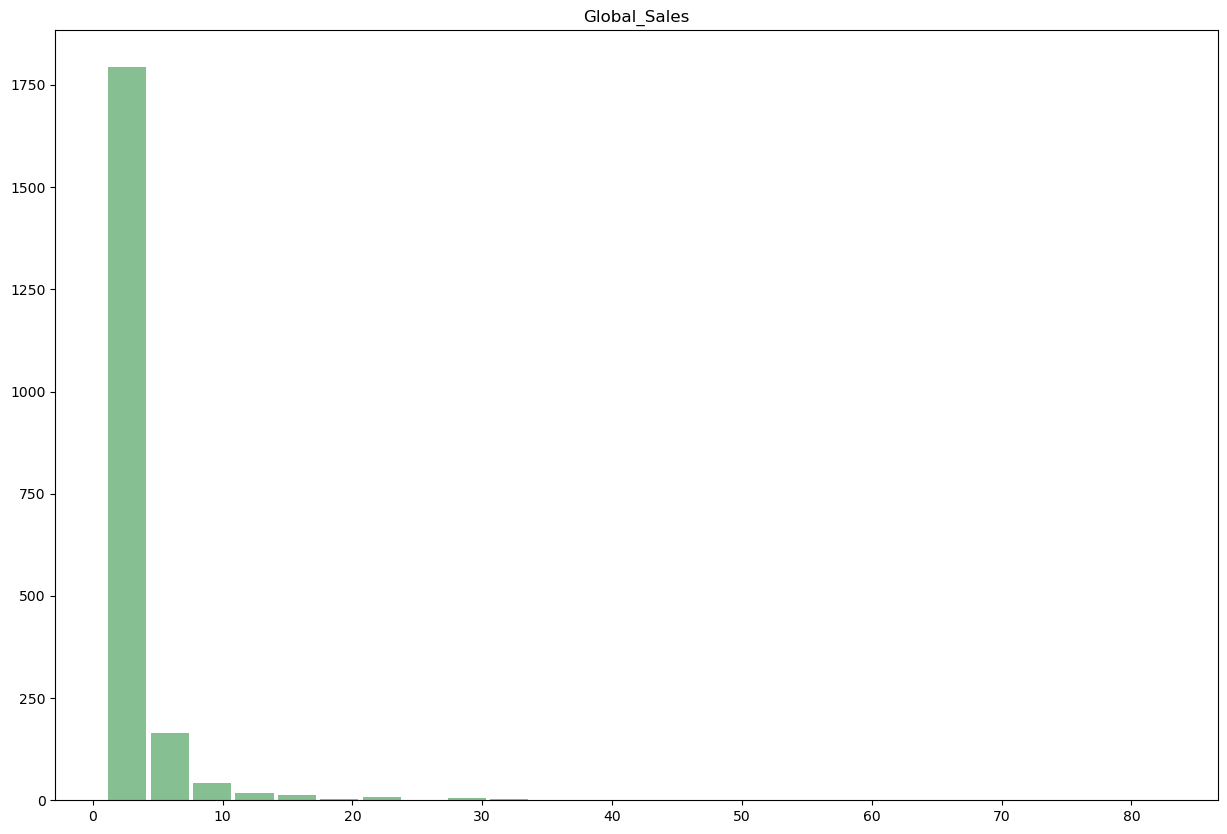

In [34]:
df_unbalanced.hist(column='Global_Sales', bins=25, grid=False, figsize=(15,10), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

In [35]:
df_balanced.shape

(14544, 7)

In [36]:
df_unbalanced.shape

(2054, 7)

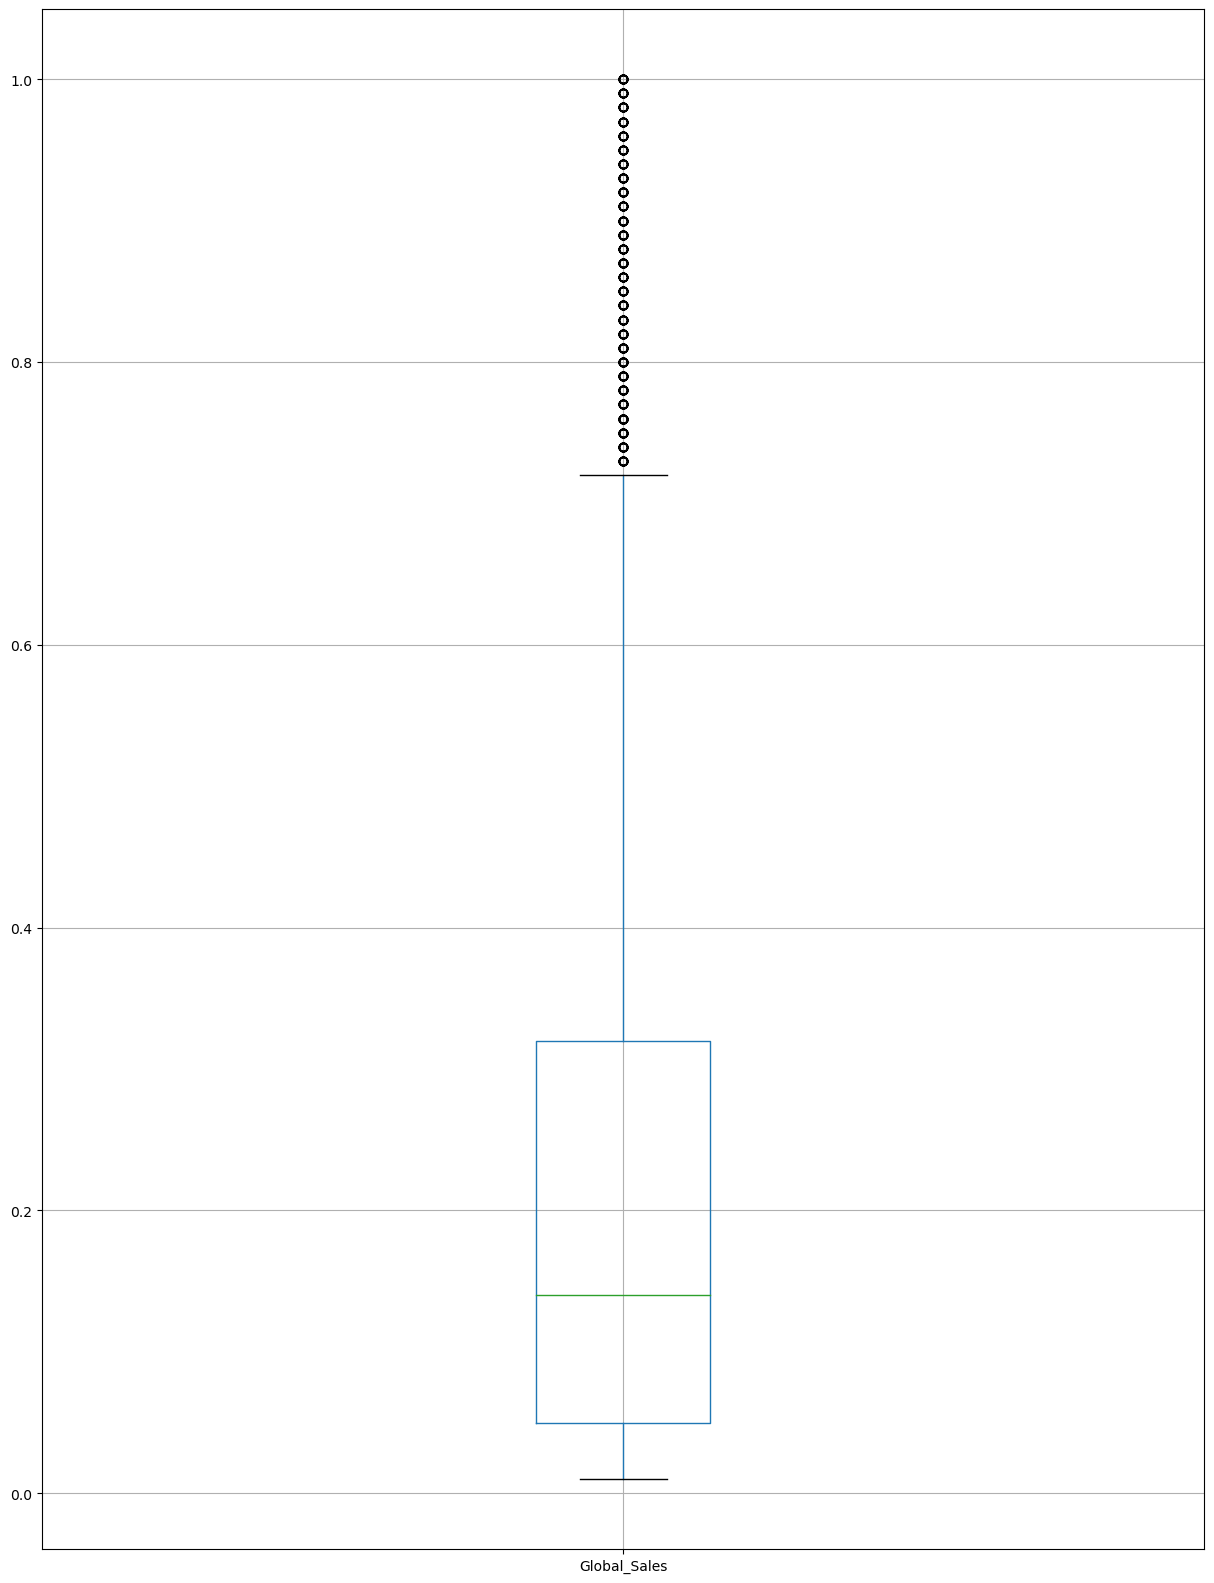

In [37]:
b_plot=df_balanced.boxplot(column='Global_Sales',figsize=(15,20)) 
b_plot.plot()
plt.show()

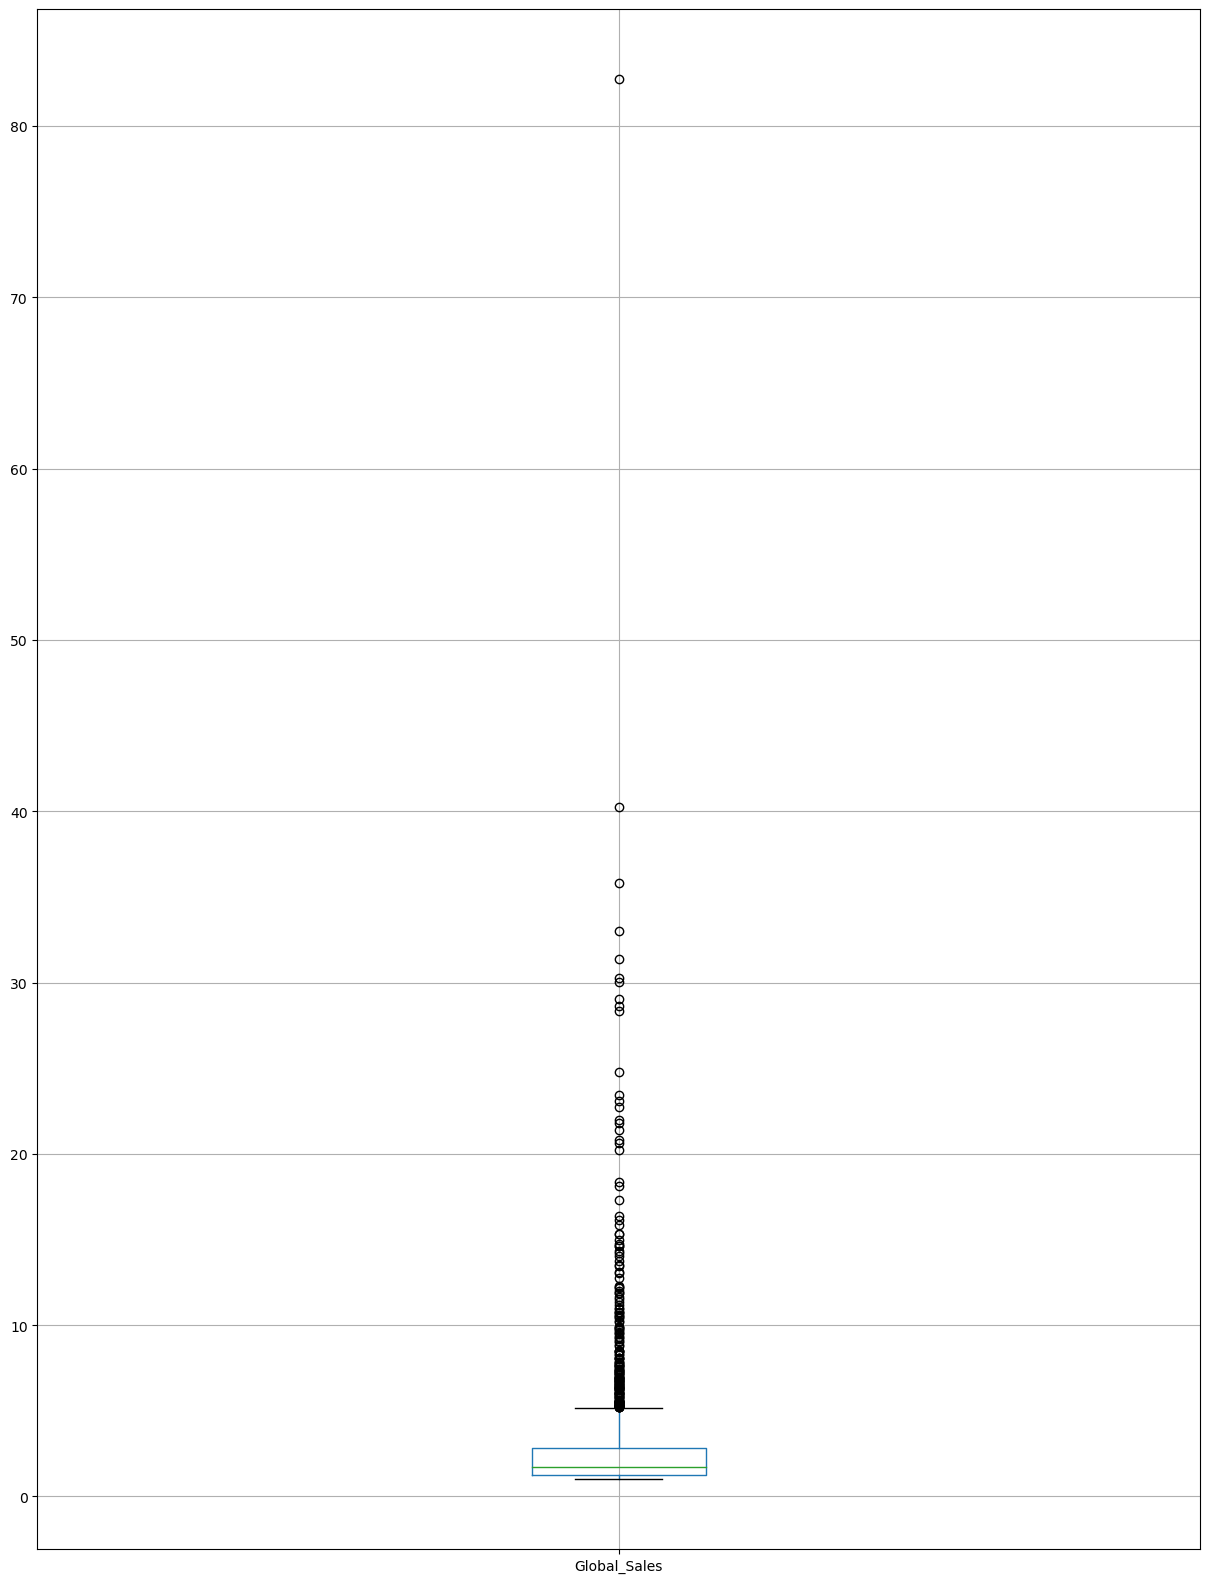

In [38]:
b_plot=df_unbalanced.boxplot(column='Global_Sales',figsize=(15,20)) 
b_plot.plot()
plt.show()

In [39]:
import datetime

current_year = datetime.datetime.now().year
df_balanced['YearsSincePublished'] = current_year - df_balanced['Year']

In [40]:
df_balanced.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,YearsSincePublished
2054,2056,NERF N-Strike Elite,Wii,2009.0,Shooter,Electronic Arts,1.0,14.0
2055,2057,Ford Racing 2,PS2,2003.0,Racing,Empire Interactive,1.0,20.0
2056,2058,Breath of Fire III,PS,1997.0,Role-Playing,Capcom,1.0,26.0
2057,2059,PES 2009: Pro Evolution Soccer,X360,2008.0,Sports,Konami Digital Entertainment,1.0,15.0
2058,2060,Dead or Alive 2,PS2,2000.0,Fighting,Tecmo Koei,1.0,23.0


<h2>Now, we'll make the dummies.</h2>
First, genre dummies, then, platform dummies and, finally, publisher dummies. Then we'll filter them If we get many unique values.

In [41]:
df_balanced['Publisher'].unique().size

571

In [42]:
df_balanced['Genre'].unique().size

12

In [43]:
df_balanced['Platform'].unique().size

31

In [44]:
dfWithDummiesPubli2=pd.concat([df_balanced, pd.get_dummies(df_balanced['Publisher'])], axis=1)

In [45]:
#dfWithDummiesGen =  pd.concat([df, pd.get_dummies(df['Genre'])], axis=1)
#dfWithDummiesPubli=pd.concat([df, pd.get_dummies(df['Publisher'])], axis=1)
#dfWithDummiesPlataform=pd.concat([df, pd.get_dummies(df['Platform'])], axis=1)

genreDummies = pd.get_dummies(df_balanced['Genre'])
platformDummies = pd.get_dummies(df_balanced['Platform'])
publisherDummies = pd.get_dummies(df_balanced['Publisher'])

# Creamos un nuevo df solo con los dummies de publisher
publisher_dummies = pd.get_dummies(df_balanced['Publisher'])

# Se calcula la correlación entre las columnas dummies y la variable target de 'sales'
corr_for_Publisher = dfWithDummiesPubli2.corr()['Global_Sales'][publisher_dummies.columns]

# El valor de correlación del que vamos a filtrar
corr_to_filter = 0.03

# Sacamos las columnas con una correlación (en valor absoluto) mayor a 0.01
corr_filtered = corr_for_Publisher[abs(corr_for_Publisher)>corr_to_filter]

# Hacemos una lista de las columnas con correlación mayor a 0.01
columns_to_keep=corr_filtered.index.tolist()

# añadimos todas las columnas que queremos al nuevo df: df_dummies_filtered
df_dummies_filtered = dfWithDummiesPubli2[columns_to_keep]

allDummies = pd.concat([genreDummies, platformDummies, df_dummies_filtered], axis=1)

In [46]:
df_dummies_filtered.shape

(14544, 36)

In [47]:
allDummies.shape

(14544, 79)

In [48]:
finalDf = pd.concat([df_balanced['YearsSincePublished'], allDummies], axis=1)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
finalDf.isna().sum()

YearsSincePublished                       249
Action                                      0
Adventure                                   0
Fighting                                    0
Misc                                        0
                                         ... 
Tecmo Koei                                  0
Ubisoft                                     0
Unknown                                     0
Warner Bros. Interactive Entertainment      0
Zoo Digital Publishing                      0
Length: 80, dtype: int64

In [51]:
finalDfCopy = finalDf.copy()
finalDfCopy = finalDfCopy[finalDfCopy['YearsSincePublished'].notna()]

In [52]:
finalDfCopy.isna().sum()

YearsSincePublished                       0
Action                                    0
Adventure                                 0
Fighting                                  0
Misc                                      0
                                         ..
Tecmo Koei                                0
Ubisoft                                   0
Unknown                                   0
Warner Bros. Interactive Entertainment    0
Zoo Digital Publishing                    0
Length: 80, dtype: int64

In [85]:
df_balanced_copy = df_balanced.copy()
df_balanced_copy = df_balanced_copy[df_balanced_copy['YearsSincePublished'].notna()]

In [54]:
y = df_balanced_copy['Global_Sales']

# variables predictoras (todas las columnas excepto Global_Sales)
X = finalDfCopy

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# crear instancia del modelo y entrenarlo
# Ajustar el modelo de regresión lineal a las características polinómicas
#poly = PolynomialFeatures(degree=2)

#X_poly = poly.fit_transform(X_train)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Ajustar el modelo de regresión lineal a las características polinómicas
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

#X_poly_test = poly.fit_transform(X_test)

# predecir valores
y_pred = poly_reg.predict(X_test)

In [55]:
y_pred

array([0.16174055, 0.14598031, 0.37998487, ..., 0.13662977, 0.13946579,
       0.21220525])

In [56]:
X_test.shape

(2859, 80)

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [58]:
# Calcular MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

# Calcular R²
r2 = r2_score(y_test, y_pred)
print("R²: ", r2)

MSE:  0.04192725337704683
MAE:  0.1539761814236288
R²:  0.20854762097872048


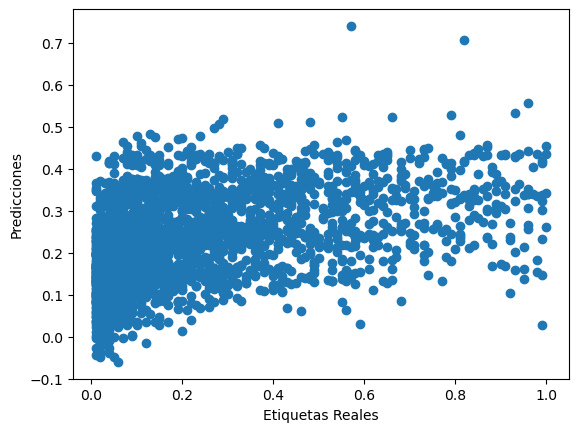

In [59]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Etiquetas Reales')
plt.ylabel('Predicciones')
plt.show()

In [60]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [61]:
df_balanced_copy.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,YearsSincePublished
2054,2056,NERF N-Strike Elite,Wii,2009.0,Shooter,Electronic Arts,1.0,14.0
2055,2057,Ford Racing 2,PS2,2003.0,Racing,Empire Interactive,1.0,20.0
2056,2058,Breath of Fire III,PS,1997.0,Role-Playing,Capcom,1.0,26.0
2057,2059,PES 2009: Pro Evolution Soccer,X360,2008.0,Sports,Konami Digital Entertainment,1.0,15.0
2058,2060,Dead or Alive 2,PS2,2000.0,Fighting,Tecmo Koei,1.0,23.0


In [86]:
df_balanced_copy_2 = df_balanced_copy.copy()

In [71]:
df_balanced_copy_2.shape

(14295, 8)

In [88]:
X = df_balanced_copy_2
y = df_balanced_copy_2['Global_Sales']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [90]:
X_train

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,YearsSincePublished
15741,15744,Elven Legacy Collection,PC,2010.0,Strategy,Paradox Interactive,0.02,13.0
16030,16033,My Little Baby,DS,2008.0,Simulation,CDV Software Entertainment,0.01,15.0
2943,2945,X-Men Origins: Wolverine - Uncaged Edition,X360,2009.0,Action,Activision,0.69,14.0
3928,3930,NBA 2K11,Wii,2010.0,Action,Take-Two Interactive,0.51,13.0
8545,8547,Dewy's Adventure,Wii,2007.0,Platform,Konami Digital Entertainment,0.16,16.0
...,...,...,...,...,...,...,...,...
7336,7338,Akiba's Trip: Undead & Undressed,PSV,2013.0,Action,Nippon Ichi Software,0.21,10.0
15700,15703,Monster High 13 Wishes,3DS,2013.0,Action,Little Orbit,0.02,10.0
7541,7543,The King of Fighters Collection: The Orochi Saga,PS2,2006.0,Fighting,Ignition Entertainment,0.20,17.0
2931,2933,Mafia,PS2,2004.0,Action,Illusion Softworks,0.70,19.0


In [91]:
X_test

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,YearsSincePublished
10430,10432,Derby Stallion P,PSP,2006.0,Sports,Enterbrain,0.10,17.0
9412,9414,Shining Force III,SAT,1997.0,Strategy,Sega,0.13,26.0
9229,9231,MySims Collection,Wii,2010.0,Misc,Electronic Arts,0.14,13.0
14800,14803,Battlezone,PSP,2006.0,Shooter,Atari,0.03,17.0
14582,14585,HappinessCharge PreCure! Kawarun Collection,3DS,2014.0,Misc,Namco Bandai Games,0.03,9.0
...,...,...,...,...,...,...,...,...
14049,14051,Gothic Universe,PC,2007.0,Role-Playing,JoWood Productions,0.04,16.0
3009,3011,Return to Castle Wolfenstein: Tides of War,XB,2003.0,Shooter,Activision,0.67,20.0
8085,8087,Battle Commander: Hachibushu Shura no Heihou,SNES,1991.0,Strategy,Banpresto,0.18,32.0
2904,2906,Tony Hawk's Underground,GC,2003.0,Sports,Activision,0.70,20.0


In [92]:
from pycaret.regression import *

In [103]:
exp_reg101 = setup(data = X_train, target='Global_Sales', session_id=123)

,Description,Value
0,Session id,123
1,Target,Global_Sales
2,Target type,Regression
3,Original data shape,"(12865, 8)"
4,Transformed data shape,"(12865, 19)"
5,Transformed train set shape,"(9005, 19)"
6,Transformed test set shape,"(3860, 19)"
7,Numeric features,3
8,Categorical features,4
9,Rows with missing values,0.2%


In [104]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:02:59
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


KNeighborsRegressor(n_jobs=-1)

In [96]:
X_train

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales,YearsSincePublished
15741,15744,Elven Legacy Collection,PC,2010.0,Strategy,Paradox Interactive,0.02,13.0
16030,16033,My Little Baby,DS,2008.0,Simulation,CDV Software Entertainment,0.01,15.0
2943,2945,X-Men Origins: Wolverine - Uncaged Edition,X360,2009.0,Action,Activision,0.69,14.0
3928,3930,NBA 2K11,Wii,2010.0,Action,Take-Two Interactive,0.51,13.0
8545,8547,Dewy's Adventure,Wii,2007.0,Platform,Konami Digital Entertainment,0.16,16.0
...,...,...,...,...,...,...,...,...
7336,7338,Akiba's Trip: Undead & Undressed,PSV,2013.0,Action,Nippon Ichi Software,0.21,10.0
15700,15703,Monster High 13 Wishes,3DS,2013.0,Action,Little Orbit,0.02,10.0
7541,7543,The King of Fighters Collection: The Orochi Saga,PS2,2006.0,Fighting,Ignition Entertainment,0.20,17.0
2931,2933,Mafia,PS2,2004.0,Action,Illusion Softworks,0.70,19.0
